# Double grating

Reference: L.M. Sanchez-Brea, F.J. Torcal-Milla, E. Bernabeu "Continuous self-imaging regime with a double-grating mask", Applied Optics, 48(30) 5722 (2009)


In [1]:
from diffractio import plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.utils_optics import convert_phase2heigths, field_parameters



In [2]:
x0 = np.linspace(-200*um, 200*um, 1024)
z0 = np.linspace(-2.5 * um, 10*um, 1024)
wavelength = .55 * um

In [3]:
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=0 * um, w0=1*mm, theta=0. * degrees)
u0.plane_wave(A=1)

In [4]:
period=50*um

red0 =  Scalar_mask_X(x=x0, wavelength=wavelength)
red0.binary_grating(period=period, a_min=1, a_max=1, phase=np.pi/1, x0=0, fill_factor=0.5)

red1 =  Scalar_mask_X(x=x0, wavelength=wavelength)
red1.binary_grating(period=period, a_min=1, a_max=1, phase=np.pi/1, x0=period/4, fill_factor=0.5)


In [5]:
depth=4*um
n=1.5
n_background=1
k=2*np.pi/wavelength

amplitude1, intensity1, phase1 = field_parameters(red0.u)
amplitude2, intensity2, phase2 = field_parameters(red1.u)

heigths1=convert_phase2heigths(phase1, wavelength, n, n_background)
heigths2=convert_phase2heigths(phase2, wavelength, n, n_background)

In [6]:
DOE = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=n_background)

profile1=np.zeros((len(DOE.x),2))
profile1[:,0]=DOE.x
profile1[:,1]=-heigths1

profile2=np.zeros((len(DOE.x),2))
profile2[:,0]=DOE.x
profile2[:,1]=heigths2+depth


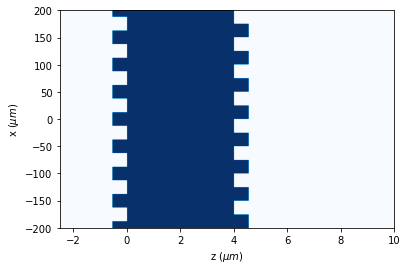

In [7]:
DOE.mask_from_array(
    r0=(0 * um, 0 * um),
    refractive_index=1.5,
    array1=profile1,
    array2=profile2,
    x_sides=None,
    angle=0 * degrees,
    v_globals={},
    interp_kind='nearest');

DOE.draw_refractive_index();

In [8]:
DOE.incident_field(u0)
DOE.BPM(verbose=False)

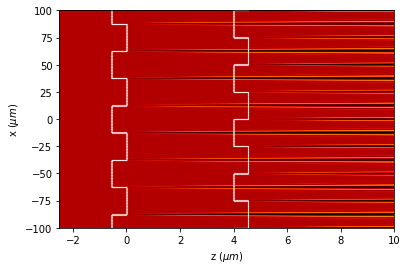

In [9]:
DOE.draw(logarithm=False, draw_borders=True)
plt.ylim(-100,100)

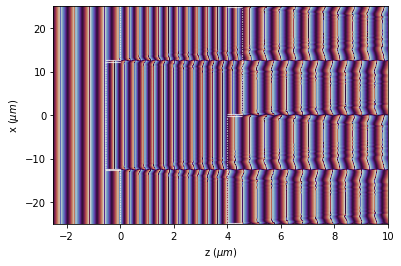

In [10]:
DOE.draw(kind='phase',draw_borders=True)
plt.ylim(-25,25)

In [11]:
u_fin=DOE.final_field()

In [12]:
z_obs=np.linspace(200*um,4*mm,512)
propagation=Scalar_mask_XZ(x=x0, z=z_obs, wavelength=wavelength, n_background=n_background)
propagation.incident_field(u_fin)
propagation.RS();

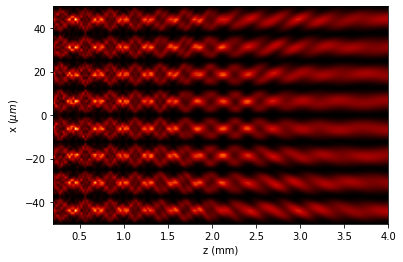

In [13]:
propagation.draw(reduce_matrix=(3,3), z_scale='mm')
plt.ylim(-50,50)